# FOREST AREA COVER PREDICTION

## Project life cycle

**1) Data understanding<br>
2) EDA to retrive pattern in the data<br>
3) Feature engineering<br>
4) Model building<br>
5) Model deploymenet<br>**

In [80]:
# importing required libraries
import pandas as pd    # for data manipulation
import numpy as np     # To deal with arrays
import matplotlib.pyplot as plt   # for visualization
import seaborn as sns        # for visualization
import warnings
warnings.filterwarnings('ignore')   # to ignore the warnings
import klib                 # For EDA

### 1) Data understanding

In [81]:
#  setting option to display all columns
pd.set_option('display.max_columns',None) 

In [82]:
# reading  data
df_train=pd.read_csv(r'train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [83]:
# shpae of the data
df_train.shape

(15120, 56)

### Information about each feature

In [84]:
a='''Name / Data Type / Measurement / Description/n
Elevation / quantitative /meters / Elevation in meters/n
Aspect / quantitative / azimuth / Aspect in degrees azimuth/n
Slope / quantitative / degrees / Slope in degrees/n
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features/n
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features/n
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway/n
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice/n
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice/n
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice/n
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points/n
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation/n
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation/n
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation/n'''

In [85]:
#  information of each feature in terms of dataframe
data=[]
for i in a.split('/n'):
    data.append(i.split('/'))
data_info=pd.DataFrame(data=data[1:],columns=data[0])
data_info['Name ']=data_info['Name '].agg(lambda x:x[1:])
data_info.drop(13,inplace=True)
data_info

,Name,Data Type,Measurement,Description
0,Elevation,quantitative,meters,Elevation in meters
1,Aspect,quantitative,azimuth,Aspect in degrees azimuth
2,Slope,quantitative,degrees,Slope in degrees
3,Horizontal_Distance_To_Hydrology,quantitative,meters,Horz Dist to nearest surface water features
4,Vertical_Distance_To_Hydrology,quantitative,meters,Vert Dist to nearest surface water features
5,Horizontal_Distance_To_Roadways,quantitative,meters,Horz Dist to nearest roadway
6,Hillshade_9am,quantitative,0 to 255 index,"Hillshade index at 9am, summer solstice"
7,Hillshade_Noon,quantitative,0 to 255 index,"Hillshade index at noon, summer soltice"
8,Hillshade_3pm,quantitative,0 to 255 index,"Hillshade index at 3pm, summer solstice"
9,Horizontal_Distance_To_Fire_Points,quantitative,meters,Horz Dist to nearest wildfire ignition points


Source:'https://www.kaggle.com/c/forest-cover-type-prediction/data'

In [86]:
# data description
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

**observations from data description**

* All soil types are binary (Data is already encoded)
* There are 7 types of forest covers in given data
* Id column is not important to classify the target
* "Vertical_Distance_to_Hydrology" column contains  negative values, it might be because the the vertical distance of the water source is below from the point of consideration (vector)


In [87]:
# dropping id column 
df_train.drop('Id',axis=1,inplace=True)

In [88]:
# after dropping id column
df_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


**Note**
* For analysis purpose we will map the encoded target column to thier actual names
* And wilderness area also map to their original names for analysis purpose

In [89]:
# mapping the actual names of target (from internship info pdf file)
d={1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'}
df_train['Cover_Type']=df_train['Cover_Type'].map(d)

In [90]:
# target column after mapping
df_train['Cover_Type'].head()

0             Aspen
1             Aspen
2    Lodgepole Pine
3    Lodgepole Pine
4             Aspen
Name: Cover_Type, dtype: object

In [91]:
# checking datatype after mapping
df_train.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Wilderness_Area1                       int64
Wilderness_Area2                       int64
Wilderness_Area3                       int64
Wilderness_Area4                       int64
Soil_Type1                             int64
Soil_Type2                             int64
Soil_Type3                             int64
Soil_Type4                             int64
Soil_Type5                             int64
Soil_Type6                             int64
Soil_Type7                             int64
Soil_Type8                             int64
Soil_Type9

### 2) EDA

* missing values
* Balance of the data
* Outlier
* Relation between categorical features and target
* Relation between numerical features and target

##### missing values

In [92]:
# checking for missing values
df_train.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


* Data is free of missing value 

**Note**
* For eda purpose lets combine all soiltype columns into one columns
and combine all wilderness_area into one single columns

In [93]:
#  getting all columns related to soil type
df_train.columns
soil_type_cols=[i for i in df_train.columns if 'Soil_Type' in i]

In [94]:
#  soil type columns
soil_type_cols

['Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [95]:
#  for eda purfose we will copy the original data into other variable such that, to not affect the original data
eda_df=df_train.copy()   # copying original data

In [96]:
# soil type columns
eda_df[soil_type_cols]

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
#  unique values in each soil type
for i in soil_type_cols:
    a=eda_df[i].unique()
    if len(a)==1:
        print(i)
        print(eda_df[i].unique())

Soil_Type7
[0]
Soil_Type15
[0]


In [98]:
#  soil type 7 and 15
eda_df[['Soil_Type7','Soil_Type15']]

,Soil_Type7,Soil_Type15
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
15115,0,0
15116,0,0
15117,0,0
15118,0,0


**Note**
* Since the soil type 7 and 15 are not present in any of the observations hence its good to drop these columns

In [100]:
#  droping soil_type 7 and 15
eda_df.drop(['Soil_Type7','Soil_Type15'],axis=1,inplace=True)

In [106]:
#  getting soil type cols after removind 7 and 15
soil_type_cols_rem=list(eda_df.columns)[14:-1]

In [111]:
#  making 40 columns into one column
soil_type=[]
soil_type_df=eda_df[soil_type_cols_rem]
for i in range(len(soil_type_df)):
    l=soil_type_df.iloc[i,:].to_list()
    ind=l.index(1)
    if ind>=0:
        soil_type.append(soil_type_cols_rem[ind])
    else:
        soil_type.append('Soil_Type41')
        


In [112]:
len(set(soil_type))

38

In [113]:
#  droping all binary columns of soil types
eda_df.drop(soil_type_cols_rem,axis=1,inplace=True)

In [114]:
# adding new column soil type instead of 41 columns
eda_df['soil_type']=soil_type   

In [115]:
#  after adding soil_type column
eda_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,soil_type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,Aspen,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,Aspen,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,Lodgepole Pine,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,Lodgepole Pine,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,Aspen,Soil_Type29


In [116]:
#  getting columns related to wilderness_area
wilderness_cols=[i for i in eda_df.columns if 'Wilderness_Area' in i]
wilderness_cols

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [117]:
#  checking unique values in each column
for i in wilderness_cols:
    print(eda_df[i].unique())

[1 0]
[0 1]
[0 1]
[0 1]


* There are 4 unique wilderness area in given data

In [118]:
#  dictionary for mapping wilderness area
wilderness_d={1:'Rawah',2:'Neota',3:'Comanche Peak',4:'Cache la Poudre'}

In [119]:
#  getting data info to add new column of wilderness area
wilderness_area_type=[]
wilderness_area_type_df=eda_df[wilderness_cols]
for i in range(len(wilderness_area_type_df)):
    l=wilderness_area_type_df.iloc[i,:].to_list()
    ind=l.index(1)
    wilderness_area_type.append(wilderness_d[ind+1])
    

In [120]:
#  droping all binary columns related to wilderness_area
eda_df.drop(wilderness_cols,axis=1,inplace=True)  # droping all binary columns related to wilderness area

In [121]:
#  adding new_columns of wilderness_area
eda_df['Wilderness_area_type']=wilderness_area_type

In [122]:
#  after adding wilderness_ area type column
eda_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,Wilderness_area_type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Soil_Type29,Rawah
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Soil_Type29,Rawah
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Soil_Type12,Rawah
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Soil_Type30,Rawah
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Soil_Type29,Rawah


##### is data balanced?

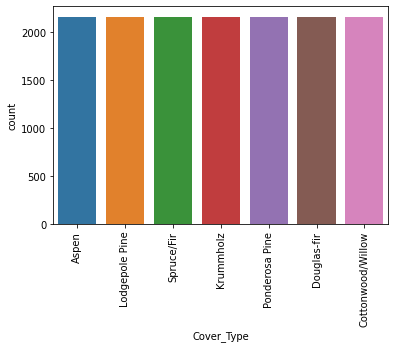

In [123]:
#  count plot of target columns
sns.countplot(eda_df['Cover_Type'])
plt.xticks(rotation=90)
plt.show()

* Data is balanced
* Each cover type has same frequency

##### is data contains outliers?

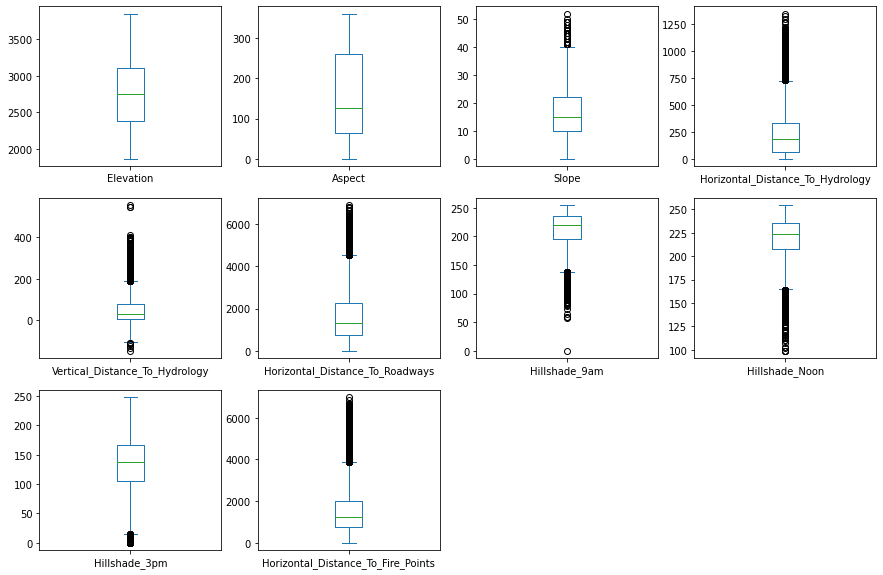

In [124]:
eda_df.plot(kind='box',layout=(-1,4),figsize=(15,10),sharex=False,subplots=True)
plt.show()

**Observations from box plot**
* Data contains outliers 
* Only Vertical_distance_to_Hydrology and Hillshade_9am column contains very few observations apart from the group
* Its good to drop those observations only which are away from crowd

In [50]:
eda_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'soil_type',
       'Wilderness_area_type'],
      dtype='object')

In [125]:
#  checking outliers in hillshade_9am
eda_df[eda_df['Hillshade_9am']<40]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,Wilderness_area_type
2241,2618,301,52,124,59,1789,0,157,231,1396,Douglas-fir,Soil_Type13,Comanche Peak


In [126]:
# dropping observation corresponding to outlier in hillshade_9am
eda_df.drop(eda_df[eda_df['Hillshade_9am']<40].index[0],inplace=True)

In [127]:
#  checking outliers in vertical distance to hydrology
eda_df[eda_df['Vertical_Distance_To_Hydrology']>450]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,Wilderness_area_type
1803,2931,283,26,778,554,854,138,230,227,2642,Lodgepole Pine,Soil_Type33,Comanche Peak
1892,2922,272,31,799,547,875,123,231,238,2136,Lodgepole Pine,Soil_Type28,Comanche Peak
11938,2924,272,32,816,547,886,122,231,238,2554,Lodgepole Pine,Soil_Type33,Comanche Peak


**Note**
* Since the above three observations all are of Cover_type "Lodgepole Pine" and are from "Comanche Peak" showing some informations so lets do not drop these observations


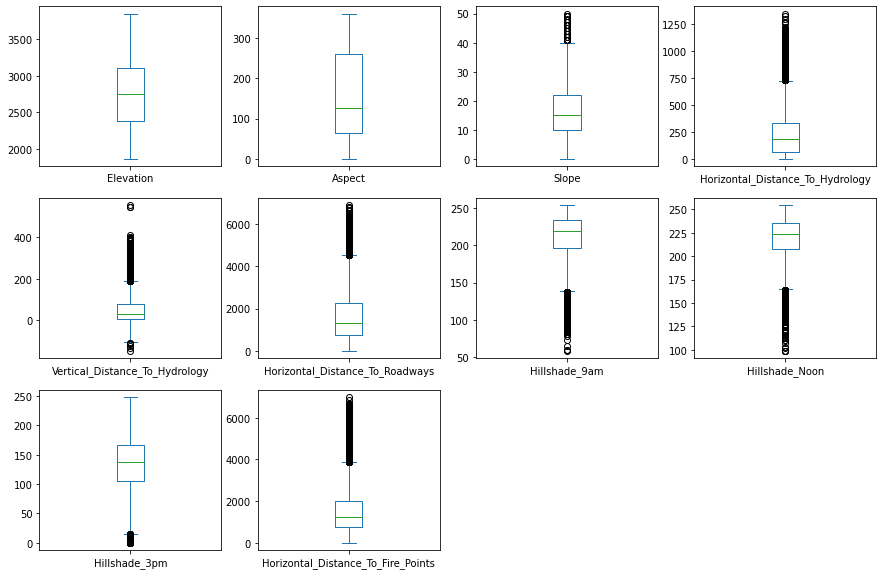

In [128]:
#  after outlier treatment
eda_df.plot(kind='box',layout=(-1,4),figsize=(15,10),sharex=False,subplots=True)
plt.show()

##### Relation between cateforical faetures and target

In [129]:
# getting columns of categorical features
cat_features=eda_df.select_dtypes(np.object).columns
cat_features

Index(['Cover_Type', 'soil_type', 'Wilderness_area_type'], dtype='object')

* **To check the realation between two categorical features one can do chisqure test**

**chisquare test to check the relationship between categorical features**<br>

**Ho: Two categorical features are not related**<br>
**Ha: Two categorical features are related**<br>

In [130]:
#  importing library
from scipy import stats

In [131]:
#  chisqure test to check relation between categorical features
for i in cat_features:
    if i!='Cover_Type':
        stas,p_val,df,ar=stats.chi2_contingency(pd.crosstab(eda_df['Cover_Type'],eda_df[i]))
        if p_val <0.05:
            print(f'Since p_value({p_val}) is less than 0.05 we reject the null hypothesis and conclude that target and {i} are "related"')


Since p_value(0.0) is less than 0.05 we reject the null hypothesis and conclude that target and soil_type are "related"
Since p_value(0.0) is less than 0.05 we reject the null hypothesis and conclude that target and Wilderness_area_type are "related"


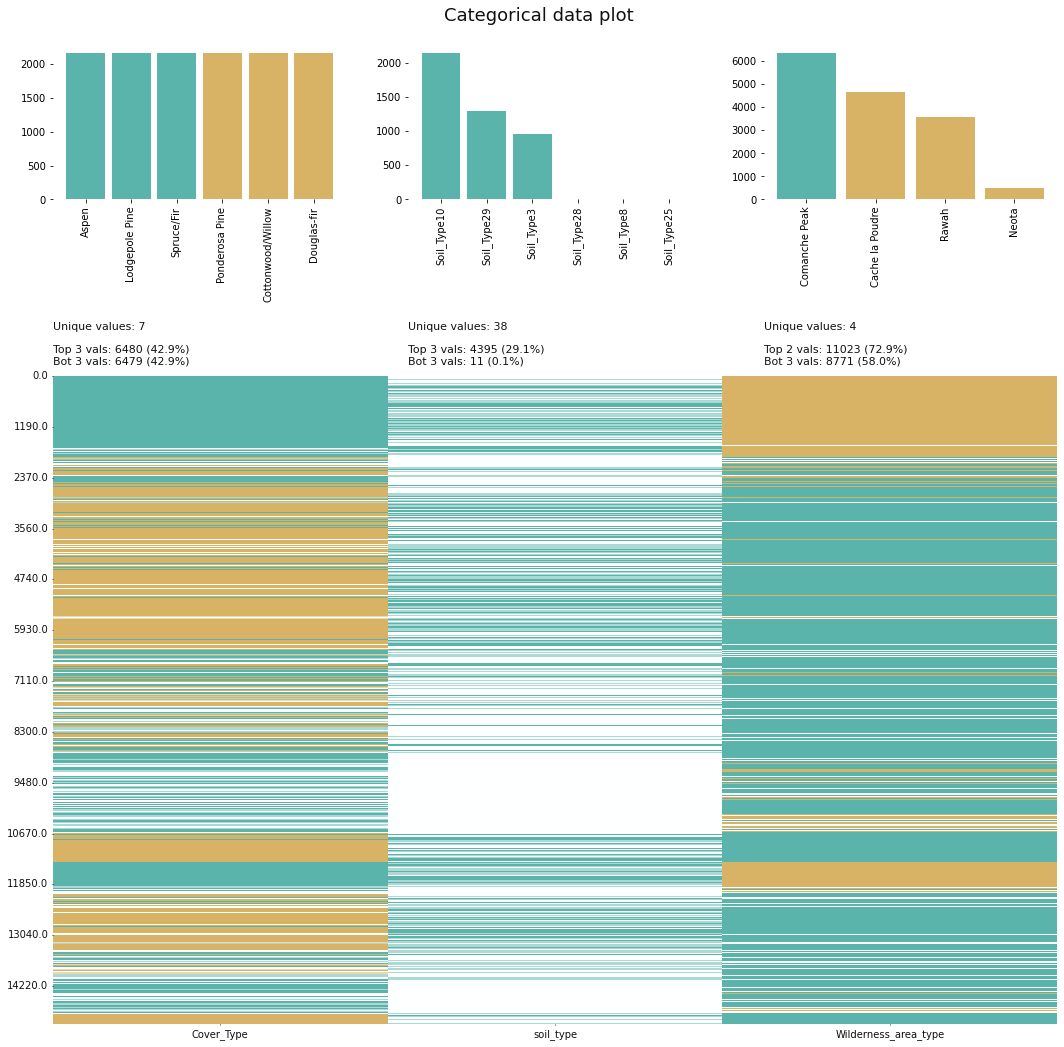

In [132]:
# understanding frequency distribution each categorical features
klib.cat_plot(eda_df)
plt.show()

* **soil_type**

In [144]:
#  count of each soil type in different cover_type
d=pd.pivot_table(data=eda_df[['soil_type','Cover_Type']],index='soil_type',columns='Cover_Type',values='Cover_Type',aggfunc=len).fillna(0)
d

Cover_Type,Aspen,Cottonwood/Willow,Douglas-fir,Krummholz,Lodgepole Pine,Ponderosa Pine,Spruce/Fir
soil_type,,,,,,,
Soil_Type1,0.0,139.0,95.0,0.0,0.0,121.0,0.0
Soil_Type10,64.0,170.0,1101.0,0.0,81.0,717.0,9.0
Soil_Type11,154.0,24.0,67.0,0.0,67.0,89.0,5.0
Soil_Type12,0.0,0.0,0.0,0.0,203.0,0.0,24.0
Soil_Type13,305.0,0.0,65.0,0.0,84.0,4.0,17.0
Soil_Type14,0.0,128.0,37.0,0.0,0.0,4.0,0.0
Soil_Type16,9.0,40.0,37.0,0.0,14.0,5.0,9.0
Soil_Type17,131.0,350.0,88.0,0.0,7.0,34.0,2.0
Soil_Type18,44.0,0.0,0.0,0.0,16.0,0.0,0.0


In [146]:
#  which soil type is common in which cover type
d.style.highlight_max(color = 'lightgreen', axis = 0)

Cover_Type,Aspen,Cottonwood/Willow,Douglas-fir,Krummholz,Lodgepole Pine,Ponderosa Pine,Spruce/Fir
soil_type,,,,,,,
Soil_Type1,0.000000,139.000000,95.000000,0.000000,0.000000,121.000000,0.000000
Soil_Type10,64.000000,170.000000,1101.000000,0.000000,81.000000,717.000000,9.000000
Soil_Type11,154.000000,24.000000,67.000000,0.000000,67.000000,89.000000,5.000000
Soil_Type12,0.000000,0.000000,0.000000,0.000000,203.000000,0.000000,24.000000
Soil_Type13,305.000000,0.000000,65.000000,0.000000,84.000000,4.000000,17.000000
Soil_Type14,0.000000,128.000000,37.000000,0.000000,0.000000,4.000000,0.000000
Soil_Type16,9.000000,40.000000,37.000000,0.000000,14.000000,5.000000,9.000000
Soil_Type17,131.000000,350.000000,88.000000,0.000000,7.000000,34.000000,2.000000
Soil_Type18,44.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000


**Observation from above table**
* most of Aspen cover type contains soil_type30
* most of cottonwood/willow cover_type are covered with soil_type_3
* Douglas-fir and Ponderosa Pine are frequnty found with soil_type_10
* Krummholz cover type frequently found with soil_type_38
* Lodgepole Pine cover_type frequently found with soil_type_29
* Spruce/Fir cover_type frequently found with soil_type_29


* **From the above observations we can say that soil_type is moderate kind of feature to segregate cover_types**

In [148]:
# value counts of soil type
soil_type_freq=eda_df['soil_type'].value_counts()
soil_type_freq

Soil_Type10    2142
Soil_Type29    1291
Soil_Type3      962
Soil_Type4      843
Soil_Type23     757
Soil_Type38     728
Soil_Type30     725
Soil_Type32     690
Soil_Type39     657
Soil_Type6      650
Soil_Type2      623
Soil_Type33     616
Soil_Type17     612
Soil_Type13     475
Soil_Type40     459
Soil_Type11     406
Soil_Type1      355
Soil_Type22     345
Soil_Type31     332
Soil_Type24     257
Soil_Type12     227
Soil_Type14     169
Soil_Type5      165
Soil_Type20     139
Soil_Type16     114
Soil_Type35     102
Soil_Type18      60
Soil_Type26      54
Soil_Type19      46
Soil_Type37      34
Soil_Type34      22
Soil_Type21      16
Soil_Type27      15
Soil_Type9       10
Soil_Type36      10
Soil_Type28       9
Soil_Type8        1
Soil_Type25       1
Name: soil_type, dtype: int64

**Note**
* Since there are some soil_types whose frequency is less than 100
* We will consider these soils as rare soil types

In [152]:
#  rare soil_types
rare_soil_type=soil_type_freq[soil_type_freq<100].index.to_list()
rare_soil_type

['Soil_Type18',
 'Soil_Type26',
 'Soil_Type19',
 'Soil_Type37',
 'Soil_Type34',
 'Soil_Type21',
 'Soil_Type27',
 'Soil_Type9',
 'Soil_Type36',
 'Soil_Type28',
 'Soil_Type8',
 'Soil_Type25']

**Note**
* 100 is just random selection there is no specific reason behind selecting 100

In [156]:
eda_df['soil_type']=eda_df['soil_type'].replace(to_replace=rare_soil_type,value='rare_soil_type')

In [157]:
#  value counts of soil type after replaced with rare soil type
eda_df['soil_type'].value_counts()

Soil_Type10       2142
Soil_Type29       1291
Soil_Type3         962
Soil_Type4         843
Soil_Type23        757
Soil_Type38        728
Soil_Type30        725
Soil_Type32        690
Soil_Type39        657
Soil_Type6         650
Soil_Type2         623
Soil_Type33        616
Soil_Type17        612
Soil_Type13        475
Soil_Type40        459
Soil_Type11        406
Soil_Type1         355
Soil_Type22        345
Soil_Type31        332
rare_soil_type     278
Soil_Type24        257
Soil_Type12        227
Soil_Type14        169
Soil_Type5         165
Soil_Type20        139
Soil_Type16        114
Soil_Type35        102
Name: soil_type, dtype: int64

* **wilderness_area**

In [158]:
eda_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'soil_type',
       'Wilderness_area_type'],
      dtype='object')

In [160]:
wild_area_vs_c_type=pd.crosstab(eda_df['Cover_Type'],eda_df['Wilderness_area_type'])
wild_area_vs_c_type

Wilderness_area_type,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
Aspen,0,1304,0,856
Cottonwood/Willow,2160,0,0,0
Douglas-fir,1198,961,0,0
Krummholz,0,1363,252,545
Lodgepole Pine,20,940,66,1134
Ponderosa Pine,1297,863,0,0
Spruce/Fir,0,917,181,1062


**Observations from above table**
* Cottonwood/Willow cover type is completely covered with "Cache la Poudre" wilderness area
* "Krummholz" and "Spruce/Fir" cover type are free of "Cache la Poundre" wilderness_area_tyep
* All four wilderness_area type are avilable only in "Lodgepole Pine" cover type only


* **From the observation of above atble wilderness area type will help to segregate cover type to some extent**

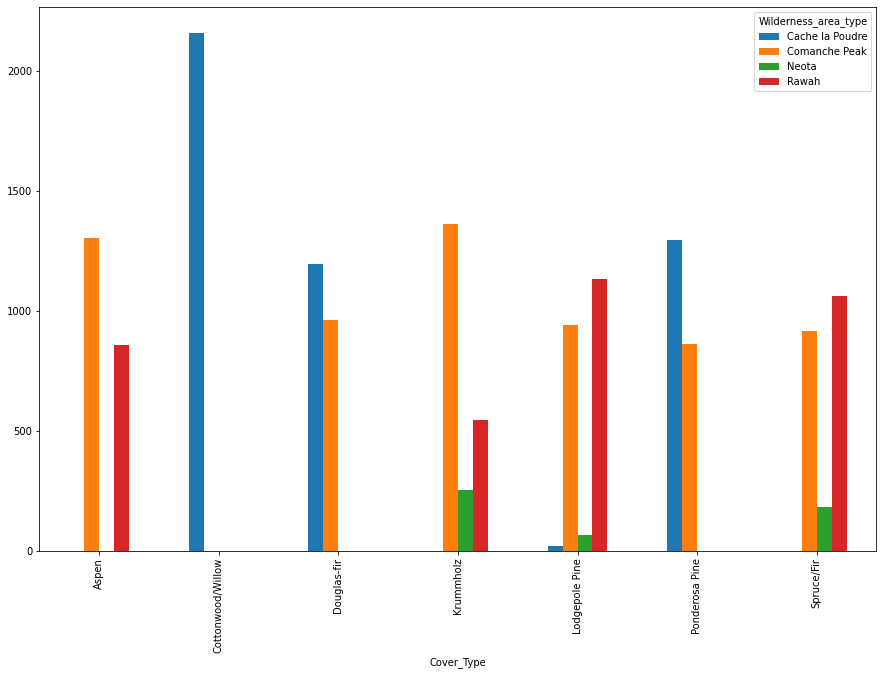

In [162]:
#  visualizing the above table
wild_area_vs_c_type.plot(kind='bar',figsize=(15,10))
plt.show()

##### Relationship between numerical features and target

In [163]:
#  getting numerical feature columns
num_features=eda_df.select_dtypes(np.number).columns  #numrical columns

In [164]:
#  dataframe of numerical features only
eda_df[num_features].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


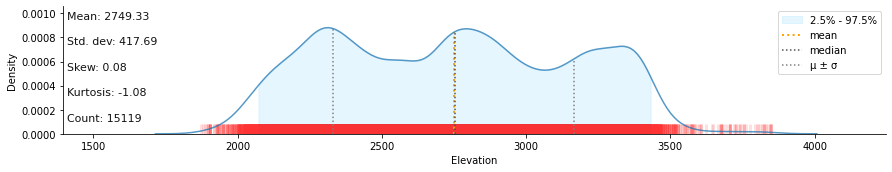

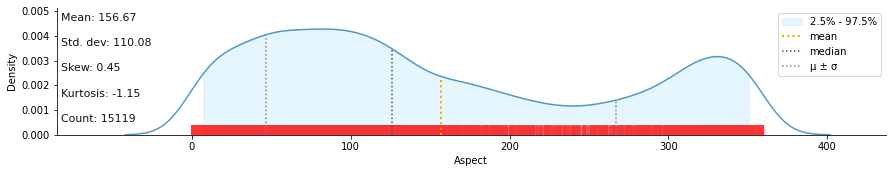

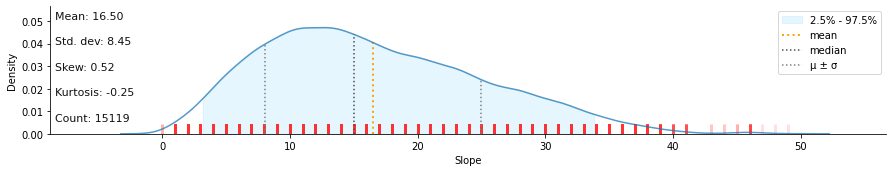

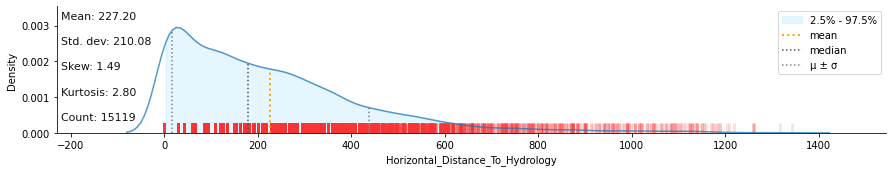

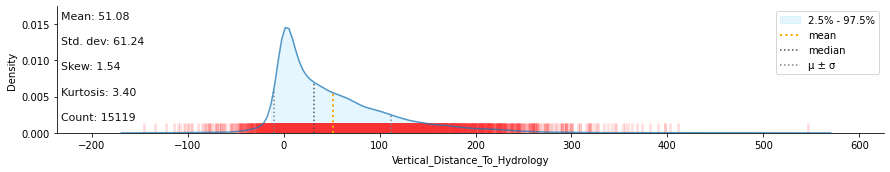

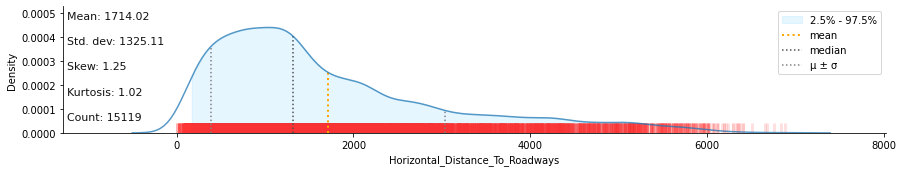

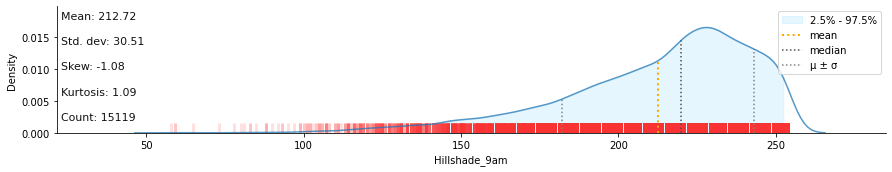

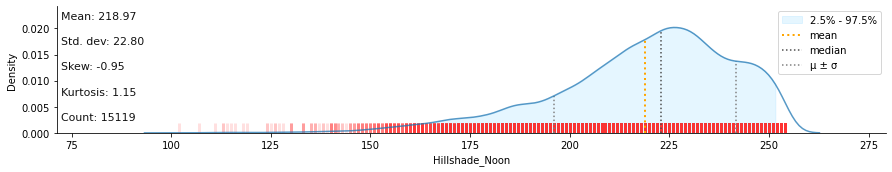

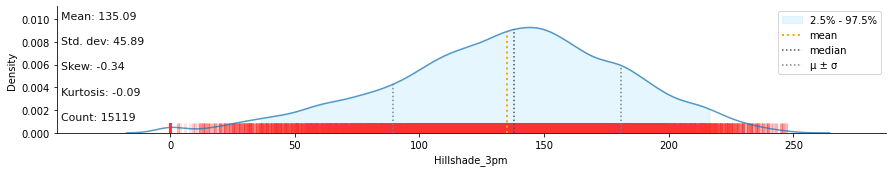

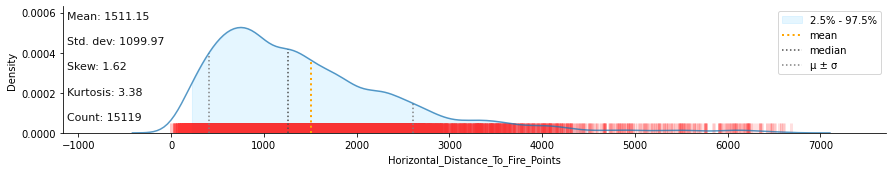

In [165]:
# distribution of all numerical features
klib.dist_plot(eda_df)
plt.show()

**Obsservations from above distribution plots**
* most of features are skewed one

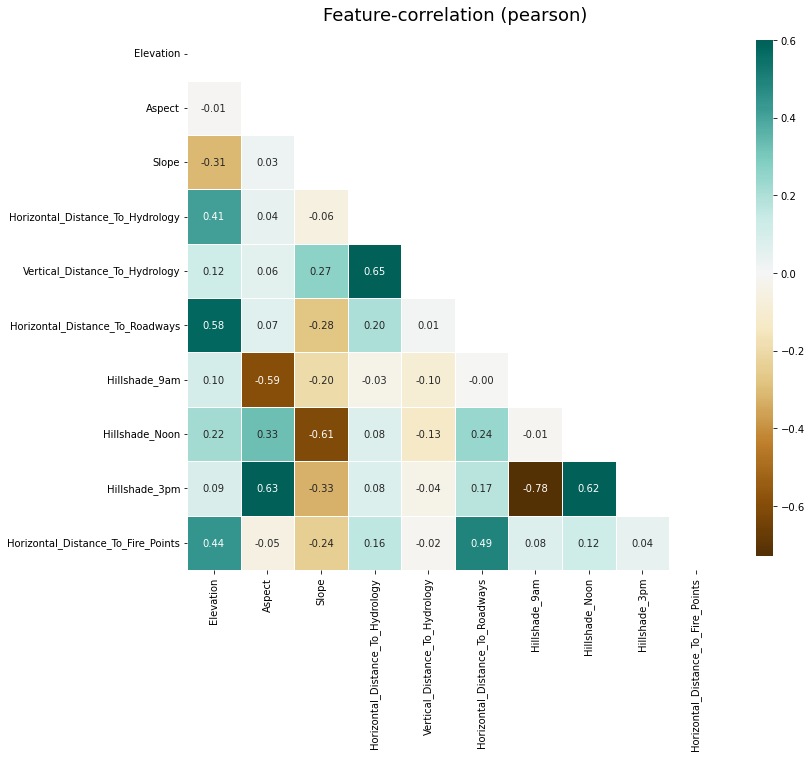

In [166]:
# correlation plot of numerical features
klib.corr_plot(eda_df)
plt.show()

**Observations from correlation plot**
* Vertical distance to hydrology and Horizontal distance to hydrology are positively corelated (0.65)
* Hillshade_3am is negatively correlated with hillshade_9am
* Hillshade _3pm is positively related with Aspect(0.63)

##### Distribution of different numerical features with respect to target feature

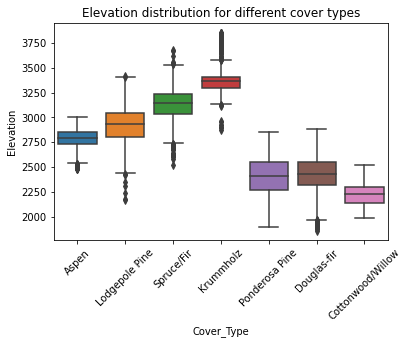

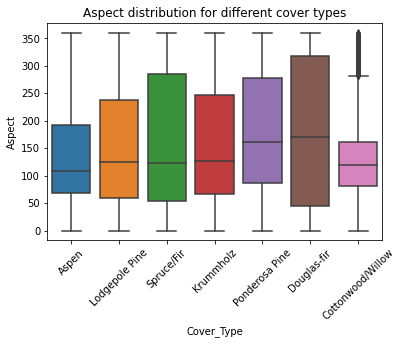

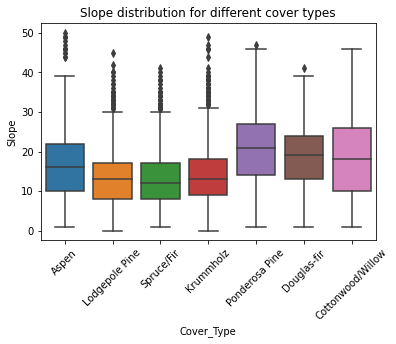

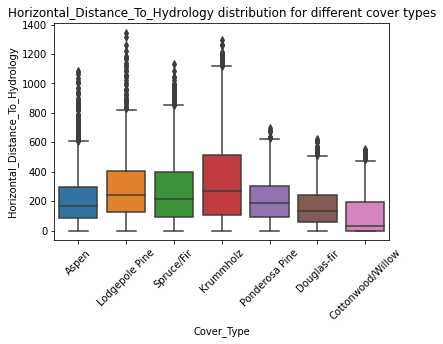

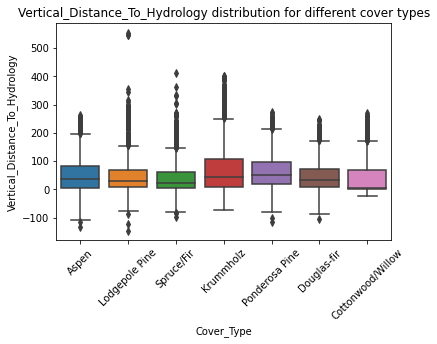

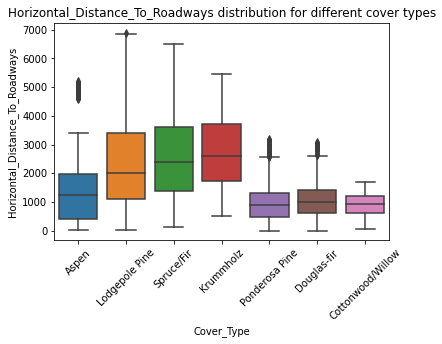

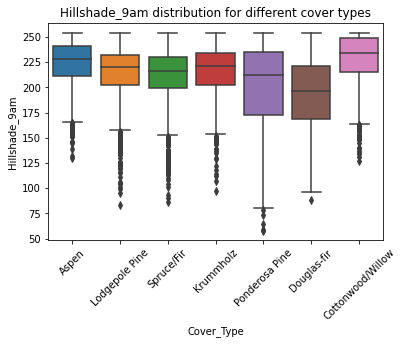

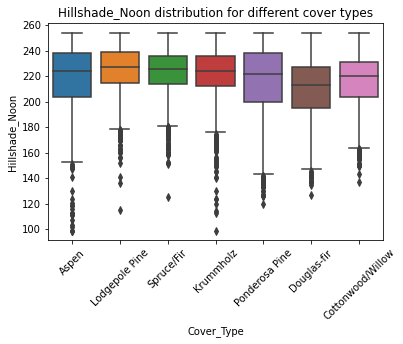

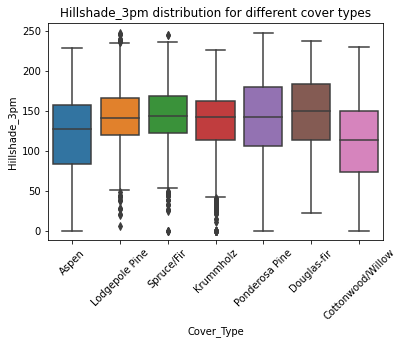

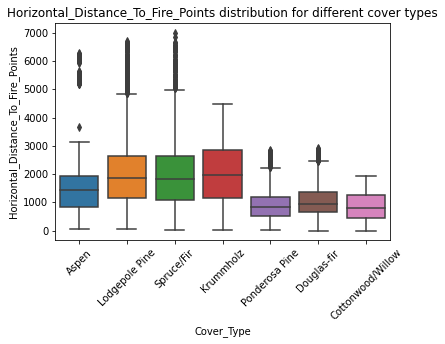

In [169]:
for i in num_features:
    sns.boxplot(data=eda_df,x='Cover_Type',y=i)
    plt.title(f'{i} distribution for different cover types')
    plt.xticks(rotation=45)
    plt.show()

**Observations from above boxplots**

**Elevation**
- For different cover types elevation is less overlapped
- Krummhalz cover_type is at highest elevation among all cover_types
- Cottonwood/willow cover_type is at lowest elevation as compared to other Cover_types
- Elevation is the good feature to segregate different cover_types

**Aspect**
- Aspect for different cover types is more overlapping hence its difficult to group the cover_types bases on aspect

**Slope**
- The mean slope for Lodgepole pine, Spruce/fir and Keummholz is lower as compared to the mean slope of other cover types

**Horizontal Distance to Hydrology**
- Mean horizontal distance for Cottonwood/willow cover type is lowest among all other cover types indicates Cottonwood/willow cover type forest is always lies near to the water surface

**Vertical_Distance_to_Hydrology**
- Mean vertical distance for willow cover type is least among other cover types which agin tells that willow cover type forest lies near to water source
- High overlapping of vertical distance to hydrology for different cover types.

**Vertical distance to roadway**
- Mean vertical distance for Ponderosa Pine, Douglass-fir and willow cover type is less among all cover types indicates they are at lower elevation, where as Lodgepole pine, spruce/fir and krummholz have high mean vertical distance to roadway indicates they found at higher elevations

**Hillshade_9am**
- Mean hillshade_9am is highest for willow cover type

**Hillshade_noon**
- more overlapping of hillshade_noon among different cover types

**Hillshade_3am**
- Except Aspen and willow cover types all other cover types have high and similar mean hillshade_3am

**Horizontal distance to fire points**
- Ponderosa Pine, willow and Douglass-fir have low mean horizontal distance to fire points as compared to other cover types indicates these cover types are more prone to fire



#### 3 Feature Engineering

- Treating outliers
- Converting categorical features into numerical
- Splitting the data for training and testing

* **Treating outliers**

- Outliers are already taken care 

* **Converting categorical features ino numerical faetures**

In [173]:
# shape of the data before encoding
eda_df.shape

(15119, 13)

In [174]:
#  seperating target and independent features
y=eda_df['Cover_Type']
x=eda_df.drop('Cover_Type',axis=1)

In [175]:
#  one hot encoding for independent features
x_encoded=pd.get_dummies(x,drop_first=True)

In [176]:
#  shape of encoded independent feature
x_encoded.shape

(15119, 39)

In [178]:
#  shape of original data
df_train.shape

(15120, 55)

In [181]:
#  mapping the taget features to numerical numbers
d={1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'}
d1=dict(zip(d.values(),d.keys()))
y_encoded=y.map(d1)

In [182]:
# target after mapping to numerical
y_encoded.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [190]:
#  combining target and independent features
df=pd.concat([x_encoded,y_encoded],axis=1)

In [191]:
# shape of full encoded cleaned data
df.shape

(15119, 40)

In [192]:
#  expoting cleaned and encoded data
df.to_csv('forest_cover_type_cleaned_data.csv')

**Splitting the data**

In [183]:
# importing library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y_encoded,test_size=0.2,stratify=y_encoded,random_state=42)

In [184]:
#  shape of training and test data
print('shape of x_train',x_train.shape)
print('sahpe of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (12095, 39)
sahpe of y_train (12095,)
shape of x_test (3024, 39)
shape of y_test (3024,)


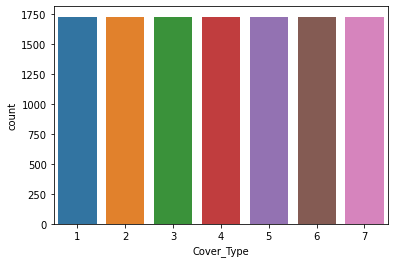

In [188]:
# value_counts of y_train
sns.countplot(y_train)
plt.show()

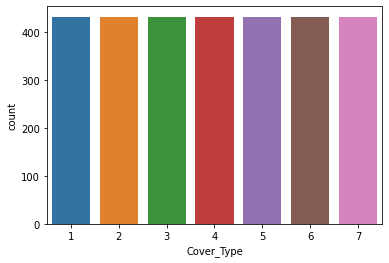

In [189]:
# value counts of y_test
sns.countplot(y_test)
plt.show()

## <font color='red'>Now The data is ready for modelling<font/>

## 4. Model Building

**Chossing model**
* We will choose decision tree as base model because there are no assumptions to be satisfied
* Based on performance of base model we will proceed further

##### Model-01 (Decision tree-Base model)

In [193]:
# importing library
from sklearn.tree import DecisionTreeClassifier

In [194]:
# initializing model
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [195]:
# train accuracy
print('Train accuracy',model1.score(x_train,y_train))
# test accuracy
print('Test accuracy',model1.score(x_test,y_test))

Train accuracy 1.0
Test accuracy 0.7787698412698413


**Observations from base model decision tree**
* model is overfitting
* Suitable Hyperparameter need to selected

##### Hyperparameter tuning on base model decisontree

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
%%time
dt1=DecisionTreeClassifier(random_state=42)
param_g={'criterion':['gini','entropy'],'max_depth':range(5,20),}
grid_df=GridSearchCV(estimator=dt1,param_grid=param_g,scoring='accuracy',cv=5) # accuracy can be used 
grid_df.fit(x_train,y_train)                                               #since data ia balanced
grid_df.best_params_

Wall time: 14.5 s


{'criterion': 'entropy', 'max_depth': 17}

##### Model-2 (Decision tree with hyperparameter tuning)

In [199]:
model2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 17)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17)

In [200]:
# train accuracy
print('Train_accuracy',model2.score(x_train,y_train))
print('test_accuracy',model2.score(x_test,y_test))

Train_accuracy 0.9848697809011988
test_accuracy 0.7688492063492064


**Observations from model2**
* Still the model performance need to improve in case of test data
* We will try with bagging techniques(Random forest)

##### Model-3 (random forest (Bagging algorithm))

In [201]:
# importing library
from sklearn.ensemble import RandomForestClassifier

In [202]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [203]:
print('train_accuracy',model3.score(x_train,y_train))
print('test accuracy',model3.score(x_test,y_test))

train_accuracy 1.0
test accuracy 0.8518518518518519


**Observations from model3**
* model perforance improved as compared to decision tree
* Still suitable hyperparameters need to select

##### Hyperparameter tuning for model-3

In [204]:
rf2=RandomForestClassifier(random_state=42)
p_grid={'n_estimators':range(50,70),'criterion':['gini','entropy'],'max_depth':range(10,20)}
grid_rf=GridSearchCV(estimator=rf2,param_grid=p_grid,cv=5,scoring='accuracy')
grid_rf.fit(x_train,y_train)
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 18, 'n_estimators': 69}

##### Model-4 (Random forest with tuned hyperparameters)

In [205]:
model4=RandomForestClassifier(criterion='gini',max_depth=18,n_estimators=69,random_state=42)
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, n_estimators=69, random_state=42)

In [206]:
print('Train accuracy',model4.score(x_train,y_train))
print('Test accuracy',model4.score(x_test,y_test))

Train accuracy 0.9937164117403886
Test accuracy 0.843584656084656


**Observations from model4**
* Model is performing better 
* We will try the same model with feature selection from feature_importance technique in random forest

##### Feature importance

In [207]:
im_features=pd.DataFrame({'features':x_train.columns,'feature_importance':model4.feature_importances_})

<BarContainer object of 39 artists>

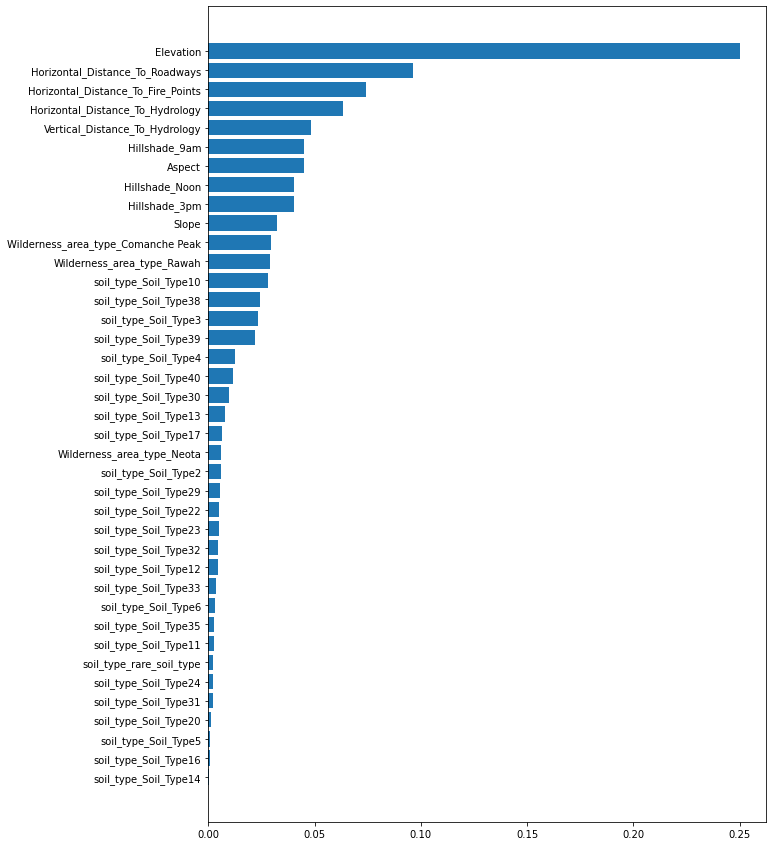

In [208]:
s_imp_features=im_features.sort_values(by='feature_importance',ascending=True)
plt.figure(figsize=(10,15))
plt.barh(width=s_imp_features['feature_importance'],y=s_imp_features['features'])

##### we will select top 15 features

In [225]:
top_15_features=s_imp_features.sort_values(by='feature_importance',ascending=False).iloc[0:15,:]['features'].values

In [227]:
# selected top 20 faetures
top_15_features

array(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Aspect',
       'Hillshade_Noon', 'Hillshade_3pm', 'Slope',
       'Wilderness_area_type_Comanche Peak', 'Wilderness_area_type_Rawah',
       'soil_type_Soil_Type10', 'soil_type_Soil_Type38',
       'soil_type_Soil_Type3'], dtype=object)

##### Model-5 (Random forest with selected features)

In [228]:
x_train_imp=x_train[top_15_features]
x_test_imp=x_test[top_15_features]

In [229]:
model5=RandomForestClassifier(random_state=42)
model5.fit(x_train_imp,y_train)

RandomForestClassifier(random_state=42)

In [230]:
print('Train accuracy',model5.score(x_train_imp,y_train))
print('Test accuracy',model5.score(x_test_imp,y_test))

Train accuracy 1.0
Test accuracy 0.843915343915344


**Observations from model-5**
* The model performance same even with only 15 fatures  only
* We will try hyperparameter tuning on model 5 and finalize the model

##### Hyper parameter tuning with best features selected

In [231]:
%%time
rf=RandomForestClassifier(random_state=42)
p_grid={'n_estimators':range(50,70),'criterion':['gini','entropy'],'max_depth':range(10,20)}
grid_rf=GridSearchCV(estimator=rf,param_grid=p_grid,cv=5,scoring='accuracy')
grid_rf.fit(x_train_imp,y_train)
grid_rf.best_params_

Wall time: 45min 51s


{'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 67}

##### Model-6 (Random forest on tuned parameters with selected features)

In [243]:
# fitting mdel
model6=RandomForestClassifier(criterion='entropy',max_depth=19,n_estimators=67,random_state=42)
model6.fit(x_train_imp,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=67,
                       random_state=42)

In [244]:
#  model accuracyies for train and test data
print('Train accuracy',model6.score(x_train_imp,y_train))
print('Test accuracy',model6.score(x_test_imp,y_test))

Train accuracy 1.0
Test accuracy 0.8429232804232805


In [246]:
#  predicting y_test
y_pred=model6.predict(x_test_imp)

In [247]:
#  confusion matrix and classification report
from sklearn.metrics import plot_confusion_matrix,classification_report

In [255]:
d

{1: 'Spruce/Fir',
 2: 'Lodgepole Pine',
 3: 'Ponderosa Pine',
 4: 'Cottonwood/Willow',
 5: 'Aspen',
 6: 'Douglas-fir',
 7: 'Krummholz'}

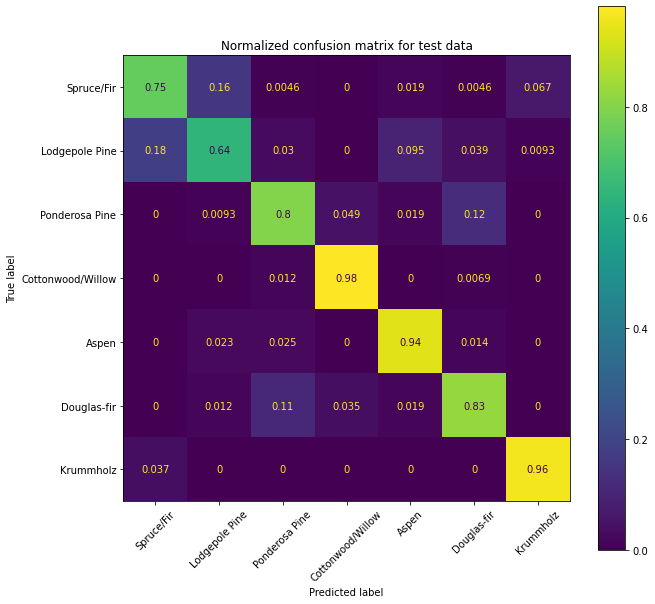

In [259]:
# plotting confusion_matric for test data
fig,ax=plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator=model6,X=x_test_imp,y_true=y_test,normalize='true',ax=ax,display_labels=d.values())
plt.xticks(rotation=45)
plt.title('Normalized confusion matrix for test data')
plt.show()

**Observations from above confusion matrix**
* Model performance is poor to classify "Spruce/fir"  and "Ponderosa Pine" cover types
* Model is working best to classify "cottonwood/willo","Aspen" and "Krummholz" cover types this is because of there unique valuea in each features among all

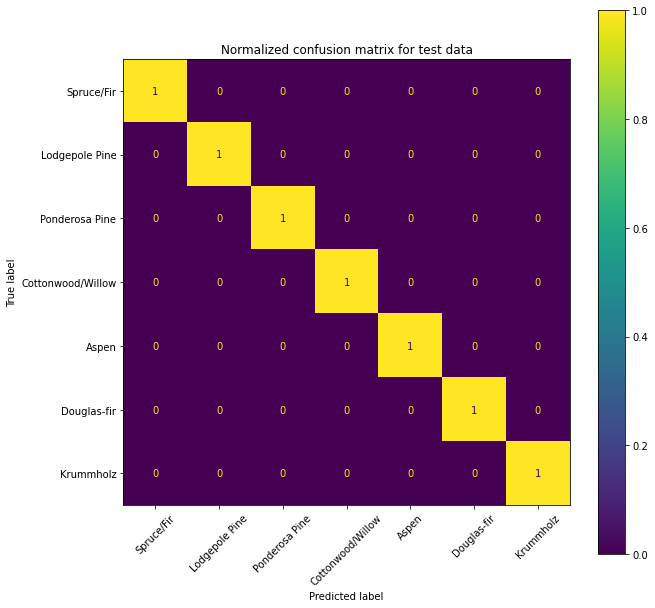

In [261]:
# plotting confusion_matric for train data
fig,ax=plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator=model6,X=x_train_imp,y_true=y_train,normalize='true',ax=ax,display_labels=d.values())
plt.xticks(rotation=45)
plt.title('Normalized confusion matrix for test data')
plt.show()

In [263]:
#  classification report for test data
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.75      0.76       432
           2       0.76      0.64      0.70       432
           3       0.82      0.80      0.81       432
           4       0.92      0.98      0.95       432
           5       0.86      0.94      0.90       432
           6       0.81      0.83      0.82       432
           7       0.93      0.96      0.94       432

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.84      0.84      0.84      3024



In [264]:
# Comparison of all models
model_comp=pd.DataFrame(columns=['model_name','Train_accuracy','Test_accuracy'])
model_comp

,model_name,Train_accuracy,Test_accuracy


In [267]:
#  appending each model performances
model_comp.loc[0]=['Decision tree without hyper parameter tuning',model1.score(x_train,y_train),model1.score(x_test,y_test)]
model_comp.loc[1]=['Decision tree with hyper parameter tuning',model2.score(x_train,y_train),model2.score(x_test,y_test)]
model_comp.loc[2]=['Random forest without hyper parameter tuning',model3.score(x_train,y_train),model3.score(x_test,y_test)]
model_comp.loc[3]=['Random forest with hyper parameter tuning',model4.score(x_train,y_train),model4.score(x_test,y_test)]
model_comp.loc[4]=['Random forest with selected features and without tuning',model5.score(x_train_imp,y_train),model5.score(x_test_imp,y_test)]
model_comp.loc[5]=['Random forest with selected features and with tuning',model6.score(x_train_imp,y_train),model6.score(x_test_imp,y_test)]

In [268]:
model_comp

,model_name,Train_accuracy,Test_accuracy
0,Decision tree without hyper parameter tuning,1.000000,0.778770
1,Decision tree with hyper parameter tuning,0.984870,0.768849
2,Random forest without hyper parameter tuning,1.000000,0.851852
3,Random forest with hyper parameter tuning,0.993716,0.843585
4,Random forest with selected features and witho...,1.000000,0.843915
5,Random forest with selected features and with ...,1.000000,0.842923


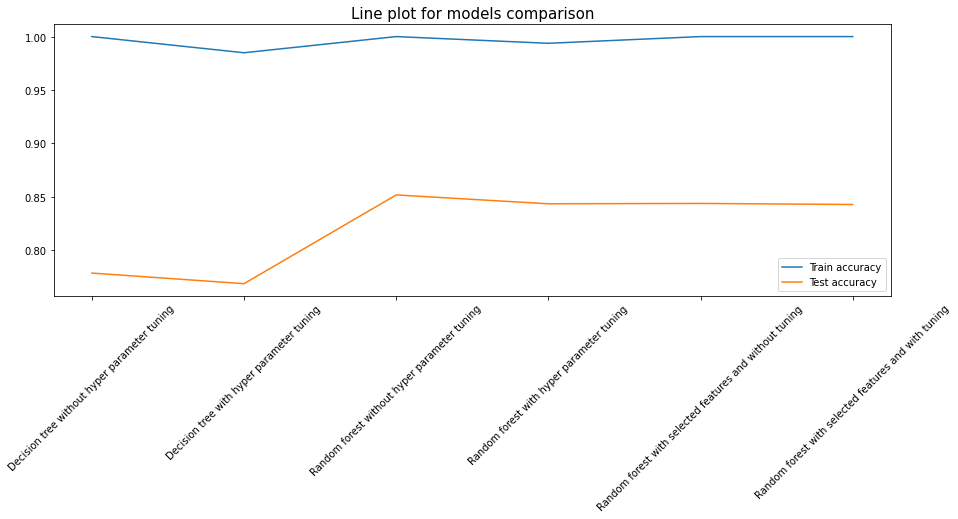

In [272]:
plt.figure(figsize=(15,5))
plt.plot(model_comp['model_name'],model_comp['Train_accuracy'],label='Train accuracy')
plt.plot(model_comp['model_name'],model_comp['Test_accuracy'],label='Test accuracy')
plt.xticks(rotation=45)
plt.title('Line plot for models comparison',size=15)
plt.legend()
plt.show()

### 5. Model deployment

In [288]:
# creating pickle file

import pickle

file=open('Forest_cover_type_prediction.pkl','wb')

pickle.dump(model6,file)
file.close()

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [286]:

m=KNeighborsClassifier(n_neighbors=3)
m.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [287]:
print('train accuracy',m.score(x_train,y_train))
print('test accuracy',m.score(x_test,y_test))

train accuracy 0.9154195948739149
test accuracy 0.8184523809523809


In [150]:
x_train.shape

(9664, 45)

* With only 20 features also we are able to get almost same accuracy as that of by using 45 fatures
* Using less than 50 % feature we can explain the same variance of data

##### classification report for rf4 model for test data

In [151]:
y_pred_rf4=rf4.predict(x_test_imp)

In [152]:
print(classification_report(y_test,y_pred_rf4))

              precision    recall  f1-score   support

           1       0.77      0.78      0.78       564
           2       0.78      0.60      0.68       520
           3       0.83      0.76      0.79       603
           4       0.93      0.97      0.95       642
           5       0.87      0.95      0.91       609
           6       0.80      0.86      0.83       629
           7       0.92      0.97      0.94       576

    accuracy                           0.85      4143
   macro avg       0.84      0.84      0.84      4143
weighted avg       0.84      0.85      0.84      4143



##### plotting confusion metrics

In [153]:
from sklearn.metrics import plot_confusion_matrix

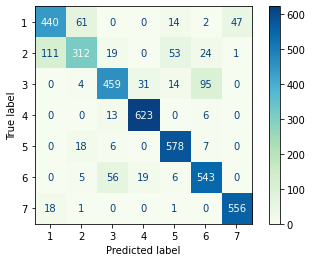

In [162]:

plot_confusion_matrix(estimator=rf4,X=x_test_imp,y_true=y_test,cmap='GnBu')
plt.show()